In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import *
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from load_data import get_data

In [10]:
x_train, y_train, x_pred = get_data()

C:\Users\gango\Projects\ADA\load_data.py:29: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  alldf = pd.concat([train_df,test_df])


Training set size: (24584, 57)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import *
from sklearn.neighbors import *

In [12]:
def test_max_sample(model):
    probs = np.array(range(1, 11)) / 10
    param_grid = {'max_samples': probs}
    clf = GridSearchCV(BaggingClassifier(model),
                       scoring='roc_auc',
                       param_grid=param_grid, cv=5, n_jobs=4,
                       verbose=5)
    res = clf.fit(x_train, y_train)
    return clf.cv_results_['mean_test_score']

In [13]:
%%time
models = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier()]
models_res = {type(model): test_max_sample(model) for model in models}

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   17.2s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  1.1min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed: 14.4min finished


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    5.9s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:  1.3min finished


Wall time: 16min 58s


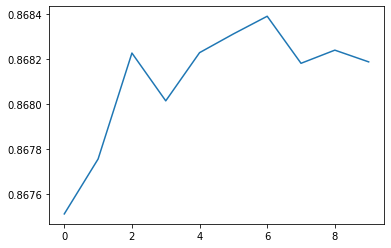

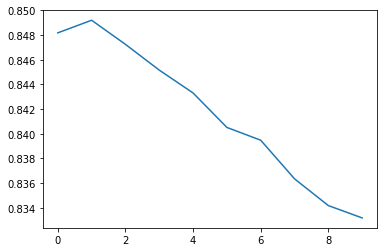

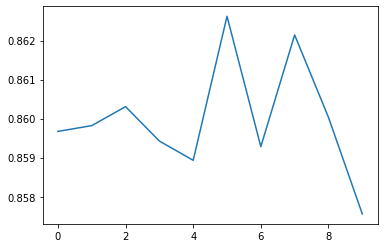

In [18]:
for r in models_res.values():
    plt.plot(r)
    plt.show()

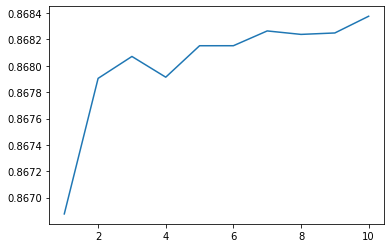

In [6]:
plt.plot(clf.cv_results_['mean_test_score'])

In [33]:
def plot_imshow_values(values):
    size_x = values.shape[1]
    size_y = values.shape[0]
#     data = np.arange(size_x * size_y).reshape(values.shape)
    
    # Limits for the extent
    x_start = 3.0
    x_end = 9.0
    y_start = 6.0
    y_end = 12.0

    extent = [x_start, x_end, y_start, y_end]

    # The normal figure
    fig = plt.figure(figsize=(16, 12))
    ax = fig.add_subplot(111)
    im = ax.imshow(values, extent=extent, origin='lower', interpolation='None', cmap='viridis')

    # Add the text
    jump_x = (x_end - x_start) / (2.0 * size_x)
    jump_y = (y_end - y_start) / (2.0 * size_y)
    x_positions = np.linspace(start=x_start, stop=x_end, num=size_x, endpoint=False)
    y_positions = np.linspace(start=y_start, stop=y_end, num=size_y, endpoint=False)

    for y_index, y in enumerate(y_positions):
        for x_index, x in enumerate(x_positions):
            label = values[y_index, x_index]
            text_x = x + jump_x
            text_y = y + jump_y
            ax.text(text_x, text_y, label, color='black', ha='center', va='center')

    fig.colorbar(im)

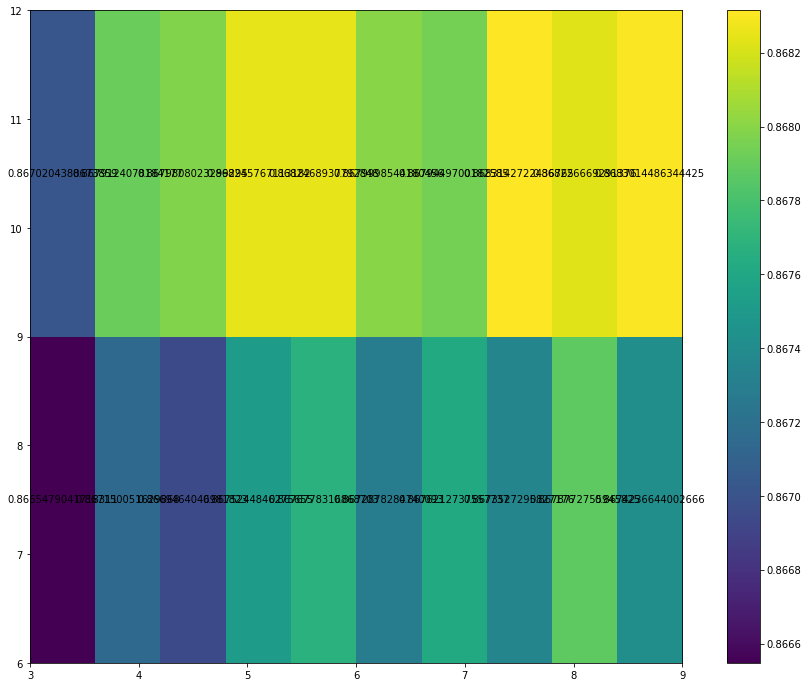